# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Rafif Alghazy
- **Email:** alalghzy@gmail.com
- **ID Dicoding:** [alalghzy](https://www.dicoding.com/users/alalghzy/)

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca memengaruhi peminjaman sepeda?
- Bagaimana perkembangan peminjaman sepeda antara tahun 2011 dan tahun 2012?
- Apakah benar faktor musim juga menjadi pengaruh terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Tahap pertama adalah mengimpor dataset Bike Sharing, terdapat 2 file pada dataset tersebut, yaitu **day.csv** dan **hour.csv**

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/alalghzy/belajar-analisis-data-dengan-python/main/data/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/alalghzy/belajar-analisis-data-dengan-python/main/data/hour.csv")

### Menampilkan tabel day dan tabel hour

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

> Cek data apakah ada data yang null atau tidak dan cek tipe data seperti apa.

In [5]:
print('''
=============================
DataFrame day
=============================
''')
day_df.info()

print('''
=============================
DataFrame hour
=============================
''')
hour_df.info()


DataFrame day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

DataFrame hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entr

> Cek apakah ada missing value pada data.

In [6]:
print('''
=============================
Cek missing values day
=============================
''')
print(day_df.isna().sum())

print('''
=============================
Cek missing values hour
=============================
''')
print(hour_df.isna().sum())


Cek missing values day

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek missing values hour

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


> Cek apakah ada data yang terduplikasi atau tidak.

In [7]:
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())
print("Jumlah duplikasi data hour: ", hour_df.duplicated().sum())

Jumlah duplikasi data day:  0
Jumlah duplikasi data hour:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Mengubah nama kolom pada tabel day dan hour

In [10]:
# Mengubah nama judul kolom tabel day
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

# Mengubah nama judul kolom tabel hour
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

### Mengubah angka menjadi keterangan sehingga lebih mudah dibaca

In [11]:
# Mengubah angka menjadi keterangan tabel day
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['year'] = day_df['year'].map({
    0: 2011, 1: 2012
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Mengubah angka menjadi keterangan tabel hour
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['year'] = hour_df['year'].map({
    0: 2011, 1: 2012
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

### Mengubah tipe data agar lebih mudah untuk mengelola data

In [12]:
# Mengubah tipe data ke datetime tabel day
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke category tabel day
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

# Mengubah tipe data ke datetime tabel hour
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)

# Mengubaha tipe data ke category tabel hour
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')

### Tampilan data untuk diolah

In [13]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Statistik data dari tabel day dan hour

In [15]:
day_df.describe(include="all", datetime_is_numeric=True)

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hour_df.describe(include="all", datetime_is_numeric=True)

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,Jul,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Kelompok data berdasarkan kondisi cuaca

In [17]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

### Kelompok data berdasarkan bulan untuk setiap tahun

In [18]:
monthly_df = day_df.groupby(by=['year', 'month']).agg({
    'count': ['max', 'min', 'mean', 'sum']
}).reset_index()

years = monthly_df['year'].unique()

for year in years:
    year_data = monthly_df[monthly_df['year'] == year]
    print(year_data)
    print("================================================")


    year month count                           
                 max   min         mean     sum
0   2011   Apr  5312   795  3162.333333   94870
1   2011   Aug  5895  1115  4409.387097  136691
2   2011   Dec  3940   705  2816.870968   87323
3   2011   Feb  2927  1005  1721.964286   48215
4   2011   Jan  1985   431  1231.903226   38189
5   2011   Jul  6043  3285  4559.387097  141341
6   2011   Jun  5515  3767  4783.733333  143512
7   2011   Mar  3239   605  2065.967742   64045
8   2011   May  5805  2633  4381.322581  135821
9   2011   Nov  4486  1495  3405.566667  102167
10  2011   Oct  5511   627  3984.225806  123511
11  2011   Sep  5423  1842  4247.266667  127418
    year month count                           
                 max   min         mean     sum
12  2012   Apr  7460  1027  5807.466667  174224
13  2012   Aug  7865  4549  6919.451613  214503
14  2012   Dec  6606   441  3990.741935  123713
15  2012   Feb  5062  1529  3556.448276  103137
16  2012   Jan  4521  1301  3120.774194 

### Kelompok data berdasarkan tahun

In [19]:
day_df.groupby('year').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
       max  min         mean      sum
year                                 
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

### Kelompok data berdasarkan musim untuk setiap tahun

In [20]:
day_df.groupby(by=['season', 'year']).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
              max   min         mean     sum
season year                                 
Fall   2011  6043  1115  4464.361702  419650
       2012  8714  4073  6824.244681  641479
Spring 2011  3239   431  1666.666667  150000
       2012  7836   441  3531.296703  321348
Summer 2011  5805   795  3775.173913  347316
       2012  8362  1027  6209.489130  571273
Winter 2011  5511   627  3664.460674  326137
       2012  8555    22  5791.865169  515476

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah kondisi cuaca memengaruhi peminjaman sepeda?


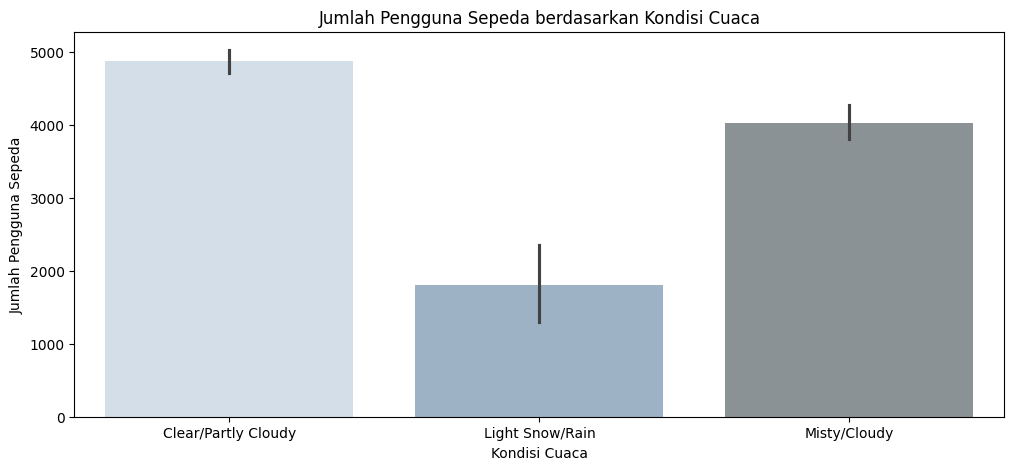

In [21]:
custom_palette = ['#d0deec', '#97b2cc', '#8a9296']

plt.figure(figsize=(12,5))
sns.barplot(
    data=day_df,
    x='weather_cond',
    y='count',
    hue='weather_cond',
    palette=custom_palette
    )

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana perkembangan peminjaman sepeda antara tahun 2011 dan tahun 2012?


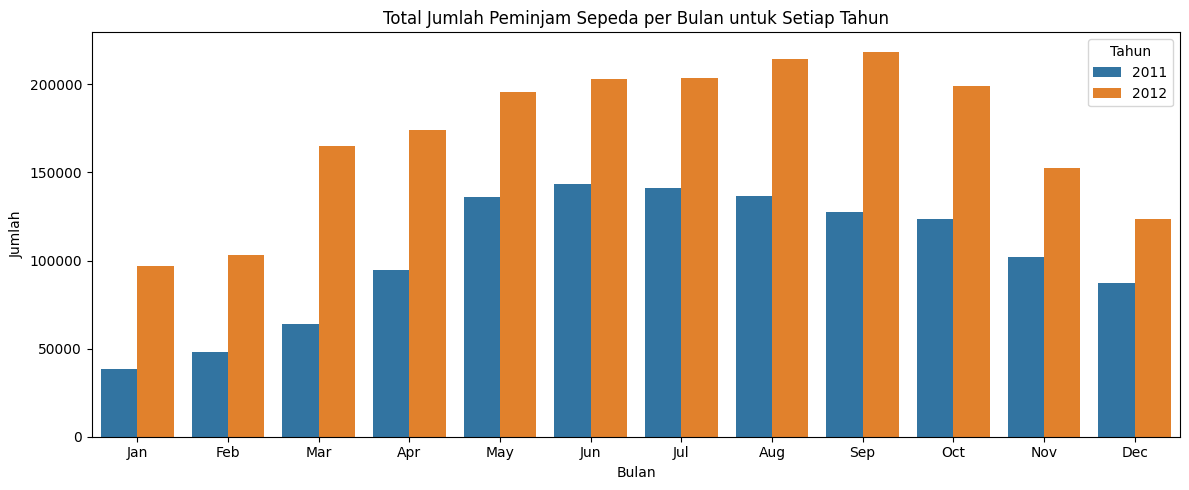

In [22]:
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

day_df['month'] = pd.Categorical(day_df['month'], categories=bulan, ordered=True)

# Mengelompokkan berdasarkan bulan dan tahun
monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="tab10")

plt.title("Total Jumlah Peminjam Sepeda per Bulan untuk Setiap Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

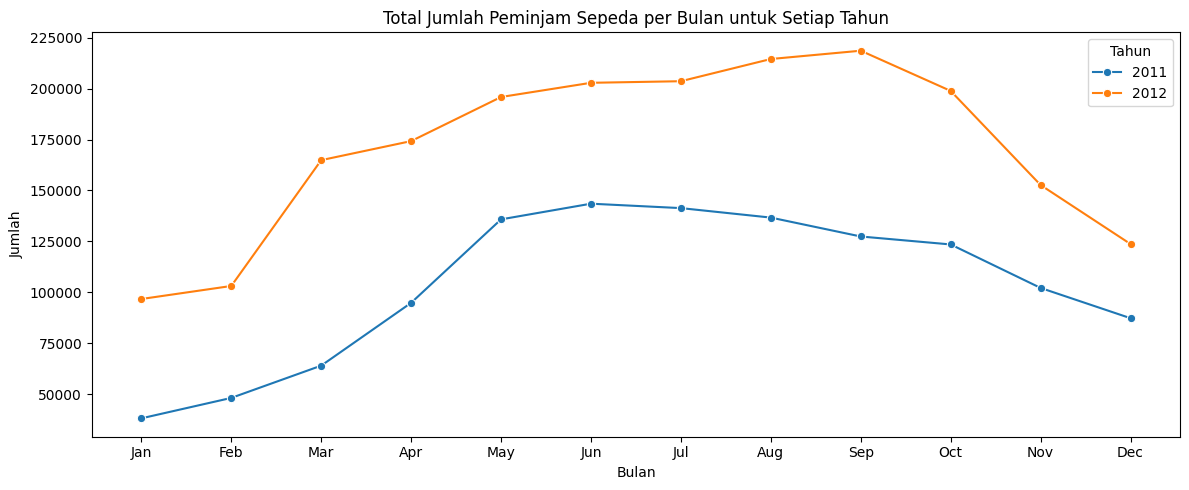

In [23]:
bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

day_df['month'] = pd.Categorical(day_df['month'], categories=bulan, ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="tab10",
    marker="o")

plt.title("Total Jumlah Peminjam Sepeda per Bulan untuk Setiap Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah benar faktor musim juga menjadi pengaruh terhadap peminjaman sepeda?


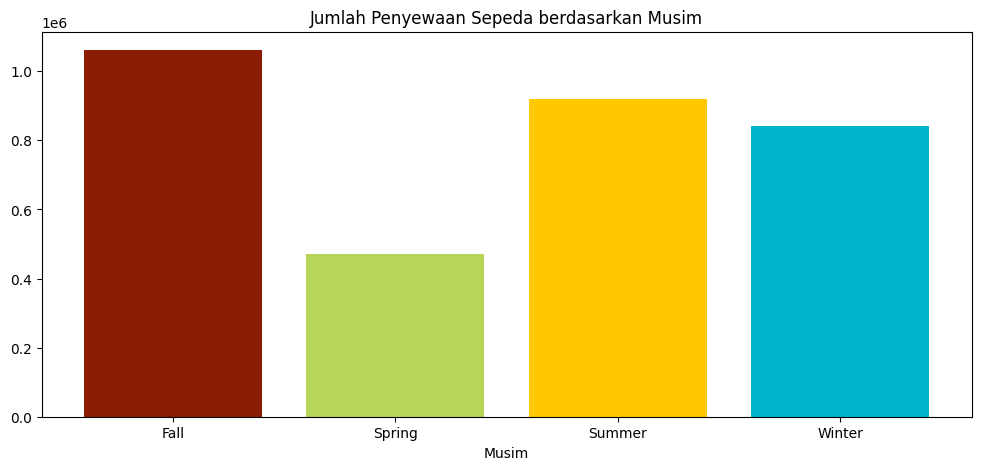

In [24]:
seasonal_usage = day_df.groupby('season').sum(numeric_only=True).reset_index()

colors = ['#8C1C04', '#b7d657', '#ffc800', '#00b4cb']

plt.figure(figsize=(12, 5))
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['count'],
    color=colors
)

plt.xlabel("Musim")
plt.ylabel("")
plt.title("Jumlah Penyewaan Sepeda berdasarkan Musim")
plt.show()


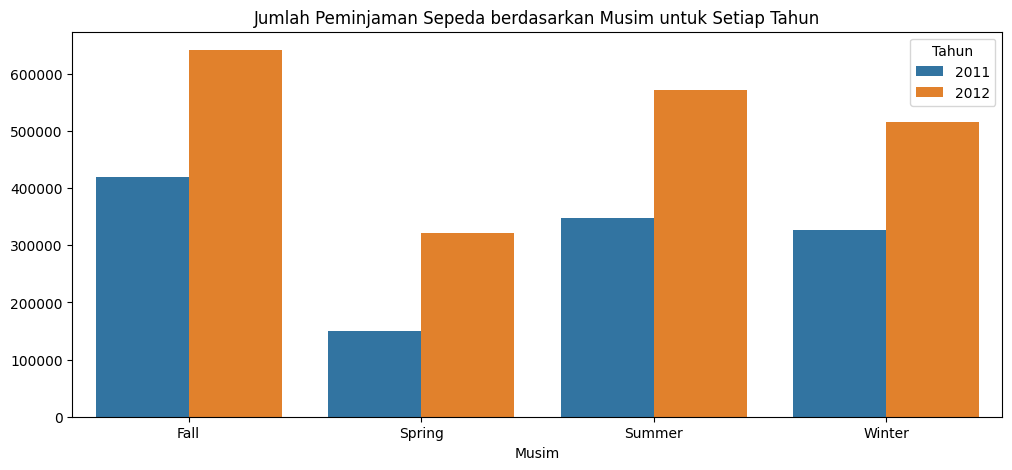

In [25]:
seasonal_usage = day_df.groupby(['year', 'season']).sum(numeric_only=True).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(
    data=seasonal_usage,
    x='season',
    y='count',
    hue='year',
)

plt.xlabel("Musim")
plt.ylabel("")
plt.title("Jumlah Peminjaman Sepeda berdasarkan Musim untuk Setiap Tahun")
plt.legend(title='Tahun')
plt.show()


## Conclusion

### Pertanyaan 1: Apakah kondisi cuaca memengaruhi peminjaman sepeda?

Ya, kondisi cuaca memengaruhi peminjaman sepeda. Dilihat dari grafik visualisasi data, pada kondisi cuaca **clearly/partly** cloudy jumlah peminjam sepeda sangat banyak, yaitu sekitar 4877, kemudian diikuti oleh kondisi cuaca **misty/cloudy**, yaitu 4035 dan **light snow/rain**, yaitu 1803.

### Pertanyaan 2: Bagaimana perkembangan peminjaman sepeda antara tahun 2011 dan tahun 2012?

Perkembangan peminjaman sepeda terlihat **naik** pada tahun 2012, kenaikan ini lumayan tinggi dari tahun sebelumnya pada tahun 2011. Total jumlah peminjam di tahun 2012 ialah 2.049.576, sedangkan pada tahun 2011 total peminjam ialah 1.243.103.  Pada grafik di bulan september 2012 merupakan kenaikan tertinggi untuk peminjaman sepeda, yaitu 218.573.


### Pertanyaan 3: Apakah benar faktor musim juga menjadi pengaruh terhadap peminjaman sepeda?

Ya, musim juga menjadi faktor pengaruh terhadap peminjaman sepeda. Terlihat pada grafik pada musim gugur (Fall) merupakan musim yang paling banyak peminjam sepeda dengan total 1.061.129 peminjam (gabungan data 2011 dan 2012), kemudian diikuti musim panas (summer) dengan total 918.589 peminjam, kemudian musim dingin (winter) dengan total 841.613, dan musim semi (spring) paling sedikit dengan total 471.348 peminjam.